## Insurance Cost Analysis

Insurance database has following features.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|




## Objectives 

In this project, you will:

 - Load the data as a `pandas` dataframe
 
 - Clean the data, taking care of the blank entries
 
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 
 - Use Ridge regression to refine the performance of Linear regression models. 


In [3]:
#importing required modules

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

### Loading data set followed by Data Wrangling

In [4]:
#reading the dataset

df = pd.read_csv('Insurance data')
df

,Age,Sex,BMI,Children,Smoker,Regions,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [5]:
# replacing missing values with nan
df.replace('?', np.nan, inplace = True )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2767 non-null   object 
 1   Sex       2771 non-null   int64  
 2   BMI       2771 non-null   float64
 3   Children  2771 non-null   int64  
 4   Smoker    2764 non-null   object 
 5   Regions   2771 non-null   int64  
 6   Charges   2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [6]:
# we have nan values for two features Age and Smoker 
# replacing age with the mean age and smoker with most frequent value
# rounding off Charges features upto 2 decimal places

df['Age'] = df['Age'].astype('float')
df['Age'].replace(np.nan, df['Age'].mean(), inplace = True)

df['Smoker'].replace(np.nan, df['Smoker'].value_counts().idxmax(), inplace = True)

df['Charges'] = df['Charges'].round(2)

df['Smoker'] = df['Smoker'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       2771 non-null   float64
 1   Sex       2771 non-null   int64  
 2   BMI       2771 non-null   float64
 3   Children  2771 non-null   int64  
 4   Smoker    2771 non-null   float64
 5   Regions   2771 non-null   int64  
 6   Charges   2771 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.7 KB


### EDA (Exploratory data analysis)

3 features in our data set are numerical thus using regression plot for 'Age', 'BMI', 'Children'-(using Box Plot)

Remaining 3 features are categorical thus using Box Plot for 'Sex', ' Smoker', 'Regions'

(0.0, 66902.85800000001)

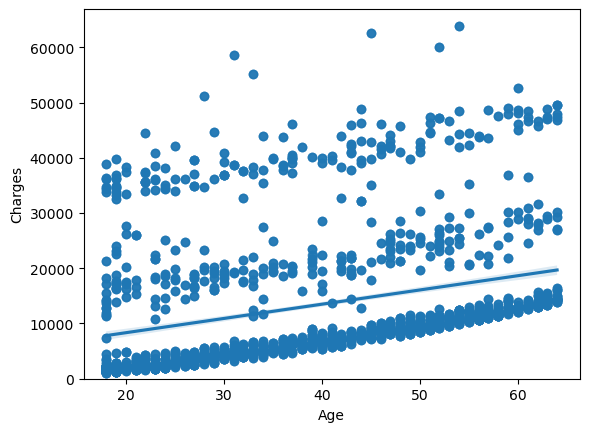

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='Age', y='Charges', data = df)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.ylim(0,)

(0.0, 66902.85800000001)

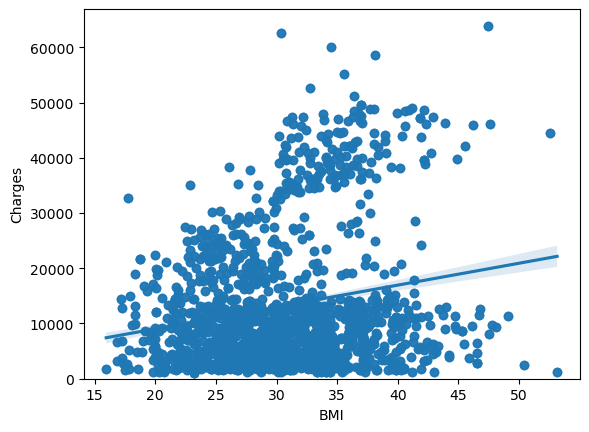

In [8]:
sns.regplot(x='BMI', y='Charges', data = df)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.ylim(0,)

(0.0, 66902.85800000001)

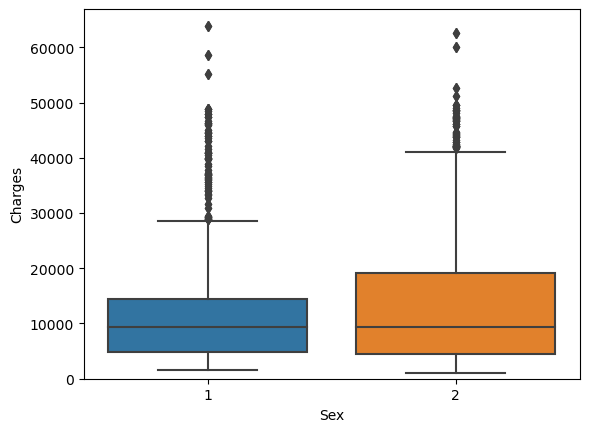

In [9]:
# 1- Female & 2- Male
sns.boxplot(x='Sex', y='Charges', data = df)
plt.xlabel('Sex')
plt.ylabel('Charges')
plt.ylim(0,)

(0.0, 66902.85800000001)

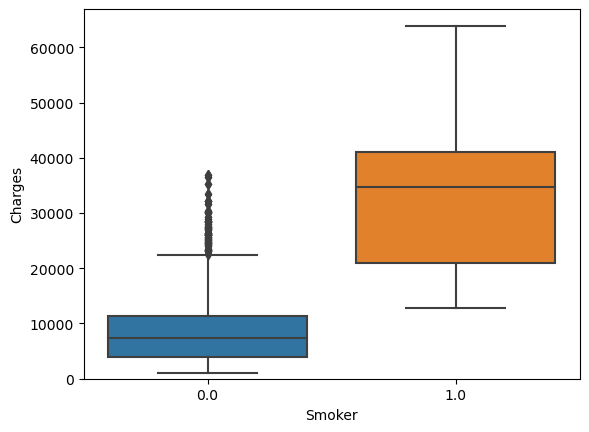

In [10]:
# 1-Smoker & 2 - Non Smoker
sns.boxplot(x='Smoker', y='Charges', data = df)
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.ylim(0,)

(0.0, 66902.85800000001)

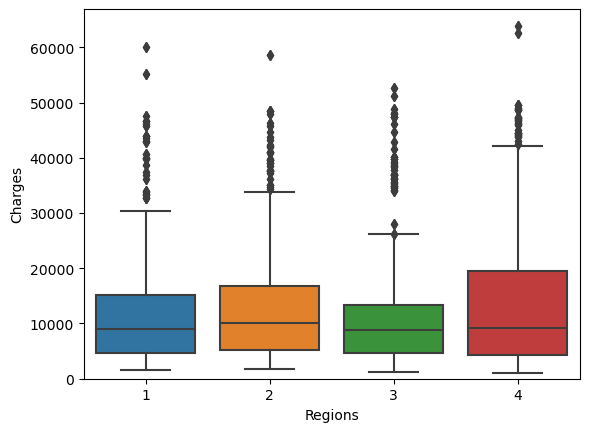

In [11]:
# 1- Northwest, 2- Northeast
# 3- Southwest, 4- Southeast
sns.boxplot(x='Regions', y='Charges', data = df)
plt.xlabel('Regions')
plt.ylabel('Charges')
plt.ylim(0,)

(0.0, 66902.85800000001)

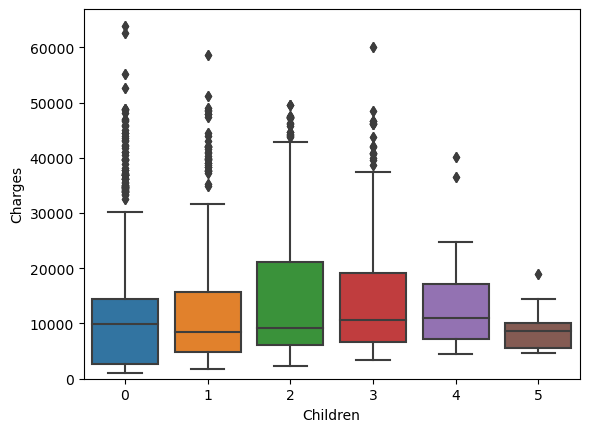

In [12]:
#plotting Chidren feature in a box plot 
sns.boxplot(x='Children', y='Charges', data = df)
plt.xlabel('Children')
plt.ylabel('Charges')
plt.ylim(0,)

In [13]:
# calculating pearsons correlation and p value for each features

from scipy import stats

headers = ['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Regions', 'Charges']

for features in headers:
    pearson_coef, p_value = stats.pearsonr(df[features], df['Charges'])
    print('Pearson coefficient for ', features,'is',pearson_coef,'with a p-value of',p_value)
    print("")

Pearson coefficient for  Age is 0.29888999967978586 with a p-value of 2.726065405725513e-58

Pearson coefficient for  Sex is 0.06295873598229353 with a p-value of 0.00091328714238907

Pearson coefficient for  BMI is 0.1999059969242699 with a p-value of 2.2609643553232046e-26

Pearson coefficient for  Children is 0.06655090334774305 with a p-value of 0.00045563954122179517

Pearson coefficient for  Smoker is 0.7891406973705085 with a p-value of 0.0

Pearson coefficient for  Regions is 0.054017976206927484 with a p-value of 0.004450693907567011

Pearson coefficient for  Charges is 1.0 with a p-value of 0.0



Pearson Coefficient, p-value for Age, BMI and Smoker features are having significant we will be taking these only these features into consideration while predicting charges

### Model Development 


In [14]:
# Since Smoker is a categorical feature
dummy_smoker = pd.get_dummies(df['Smoker'])
dummy_smoker.rename(columns = {0.0:'Non Smoker',1.0:'smoker'}, inplace = True)
dummy_smoker

# adding the it to the df and removing the original feature
df = pd.concat([df,dummy_smoker], axis =1)
df.drop('Smoker', axis = 1, inplace=True)
df

,Age,Sex,BMI,Children,Regions,Charges,Non Smoker,smoker
0,18.0,2,33.770,1,4,1725.55,1,0
1,28.0,2,33.000,3,4,4449.46,1,0
2,33.0,2,22.705,0,1,21984.47,1,0
3,32.0,2,28.880,0,1,3866.86,1,0
4,31.0,1,25.740,0,4,3756.62,1,0
...,...,...,...,...,...,...,...,...
2766,47.0,1,45.320,1,4,8569.86,1,0
2767,21.0,1,34.600,0,3,2020.18,1,0
2768,19.0,2,26.030,1,1,16450.89,0,1
2769,23.0,2,18.715,0,1,21595.38,1,0


In [15]:
x= df[['Age','BMI', 'Non Smoker', 'smoker']]
y = df['Charges']
lr = LinearRegression()
lr.fit(x, y)
print('R^2 score of the model is',lr.score(x,y))

R^2 score of the model is 0.7472157862095232


In [16]:
# Creating a pipeline that uses StandardScaler(), PolynomialFeatures(), LinearRegression() with the features to predict charge

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe.fit(x,y)
ypipe = pipe.predict(x)
print('R^2 score after using pipeline is', r2_score(y,ypipe))

R^2 score after using pipeline is 0.8381983007665076


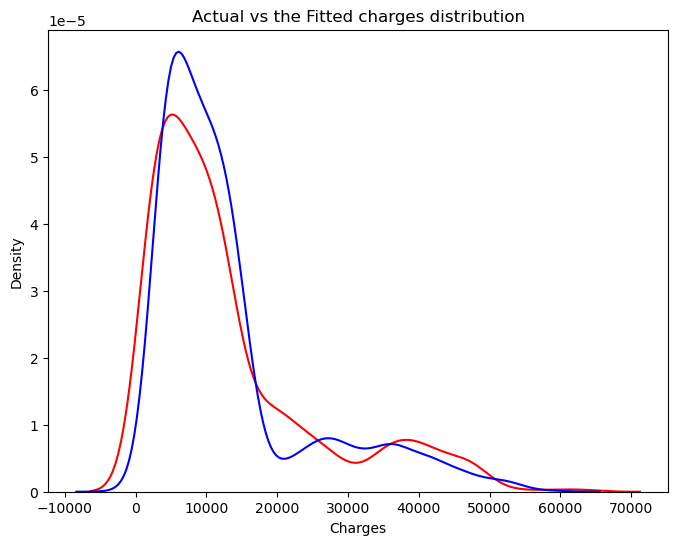

In [17]:
# kde plot to evaluate model performance 

width = 8
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(y, color ='r', label= 'Actual charges')
ax2 = sns.kdeplot(ypipe, color = 'b', label = 'Fitted charges', ax=ax1)

plt.title('Actual vs the Fitted charges distribution')
plt.show()
plt.close()

### Model Refinement 
From Kde plot we see that model overfits for charges around [5000,18000] we can use ridge regression to handle the Over fitting

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state =1 )

# Creating a pipeline that uses StandardScaler(), PolynomialFeatures(), RidgeRegression() with the features to predict charge

Input2 = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree =4, include_bias = False)), ('model', Ridge(alpha=0.1
                                                                                                               ))]
pipe2 = Pipeline(Input2)
pipe2.fit(x_train,y_train)
ypipe2 = pipe2.predict(x_test)
print('Train R^2 score is ',pipe2.score(x_train, y_train))
print('Test R^2 score is',pipe2.score(x_test, y_test))

Train R^2 score is  0.8523294751043856
Test R^2 score is 0.8226080699788175


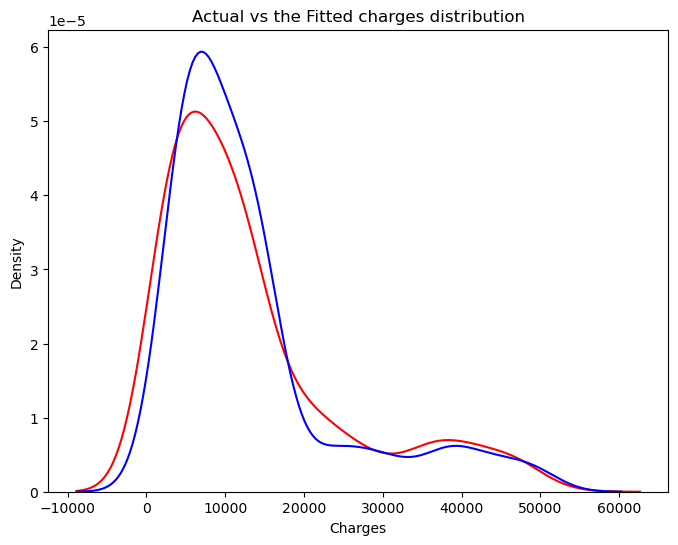

In [19]:
# kde plot to evaluate model performance after using ridge regression to dampen down the model overfitting

width = 8
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.kdeplot(y_test, color ='r', label= 'Actual charges')
ax2 = sns.kdeplot(ypipe2, color = 'b', label = 'Fitted charges', ax=ax1)

plt.title('Actual vs the Fitted charges distribution')
plt.show()
plt.close()

The RidgeRegression model performs better in predicting price as we see in incease in both Train and Test R^2 score

In [20]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [21]:
df_new = pd.read_csv(filepath)
df_new

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
